<a href="https://colab.research.google.com/github/DANUSHMATHI2002/7PAM2000-0901-Applied_Data_Science/blob/main/ASS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/SleepStudyData.csv')

In [3]:
df.head(5)

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
0,Yes,8.0,Yes,Yes,3,Yes
1,No,6.0,Yes,Yes,3,No
2,Yes,6.0,Yes,Yes,2,Yes
3,No,7.0,Yes,Yes,4,No
4,No,7.0,Yes,Yes,2,Yes


In [4]:

from sklearn import preprocessing

# Load the existing data
df = pd.read_csv('/content/SleepStudyData.csv')

# Calculate SleepDeficit
df['SleepDeficit'] = df['Hours'].apply(lambda x: max(0, 8 - x))

# Calculate PhoneDependency
df['PhoneDependency'] = df.apply(lambda row: 'High' if (row['PhoneReach'] == 'Yes' and row['PhoneTime'] == 'Yes') else 'Low', axis=1)

# Calculate SleepQuality
df['SleepQuality'] = df.apply(lambda row: 'Good' if (row['Tired'] <= 2 and row['Enough'] == 'Yes') else 'Poor', axis=1)

# Label encode categorical variables
label_encoder = preprocessing.LabelEncoder()
df['Enough'] = label_encoder.fit_transform(df['Enough'])
df['PhoneReach'] = label_encoder.fit_transform(df['PhoneReach'])
df['PhoneTime'] = label_encoder.fit_transform(df['PhoneTime'])
df['Breakfast'] = label_encoder.fit_transform(df['Breakfast'])
df['PhoneDependency'] = label_encoder.fit_transform(df['PhoneDependency'])
df['SleepQuality'] = label_encoder.fit_transform(df['SleepQuality'])

# Rename columns for user readability
df.rename(columns={
    'Enough': 'Enough_Sleep',           # Indicates if the participant feels they get enough sleep
    'Hours': 'Sleep_Hours',                 # Average hours of sleep
    'PhoneReach': 'Phone_Reach',      # Indicates if phone is within reach at night
    'PhoneTime': 'Phone_Before_Sleep',    # Indicates if the phone is used before sleep
    'Tired': 'Daytime_Tiredness',           # Tiredness level throughout the day
    'Breakfast': 'Eats_Breakfast',          # Indicates if the participant typically eats breakfast
    'SleepDeficit': 'Sleep_Deficit',        # Calculated sleep deficit
    'PhoneDependency': 'Phone_Dependency',   # Indicates level of phone dependency
    'SleepQuality': 'Sleep_Quality'          # Indicates overall sleep quality
}, inplace=True)

# Save the updated DataFrame to a new CSV file
df.to_csv('/content/Updated_SleepStudyData.csv', index=False)






In [5]:
df.head(5)

,Enough_Sleep,Sleep_Hours,Phone_Reach,Phone_Before_Sleep,Daytime_Tiredness,Eats_Breakfast,Sleep_Deficit,Phone_Dependency,Sleep_Quality
0,1,8.0,1,1,3,1,0.0,0,1
1,0,6.0,1,1,3,0,2.0,0,1
2,1,6.0,1,1,2,1,2.0,0,0
3,0,7.0,1,1,4,0,1.0,0,1
4,0,7.0,1,1,2,1,1.0,0,1


In [14]:
summary_stats=df.describe()
summary_stats



,Enough_Sleep,Sleep_Hours,Phone_Reach,Phone_Before_Sleep,Daytime_Tiredness,Eats_Breakfast,Sleep_Deficit,Phone_Dependency,Sleep_Quality
count,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,0.346154,6.656863,0.692308,0.807692,3.076923,0.605769,1.413462,0.413462,0.817308
std,0.478047,1.417676,0.463774,0.396022,1.011510,0.491051,1.274169,0.494839,0.388285
min,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,7.000000,1.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,7.000000,1.000000,1.000000,4.000000,1.000000,2.000000,1.000000,1.000000
max,1.000000,10.000000,1.000000,1.000000,5.000000,1.000000,6.000000,1.000000,1.000000


In [13]:
correlation_matrix = df.corr()
correlation_matrix

,Enough_Sleep,Sleep_Hours,Phone_Reach,Phone_Before_Sleep,Daytime_Tiredness,Eats_Breakfast,Sleep_Deficit,Phone_Dependency,Sleep_Quality
Enough_Sleep,1.000000,0.380740,-0.084214,-0.003945,-0.417006,0.132029,-0.412579,0.045778,-0.649786
Sleep_Hours,0.380740,1.000000,-0.054957,0.151378,-0.191913,0.225818,-0.975697,0.000973,-0.331357
Phone_Reach,-0.084214,-0.054957,1.000000,0.150451,-0.073232,-0.239392,0.036651,-0.794035,0.223953
Phone_Before_Sleep,-0.003945,0.151378,0.150451,1.000000,-0.035423,0.005761,-0.167984,-0.581174,0.148132
Daytime_Tiredness,-0.417006,-0.191913,-0.073232,-0.035423,1.000000,-0.251096,0.231204,0.052222,0.604680
Eats_Breakfast,0.132029,0.225818,-0.239392,0.005761,-0.251096,1.000000,-0.249019,0.237810,-0.177729
Sleep_Deficit,-0.412579,-0.975697,0.036651,-0.167984,0.231204,-0.249019,1.000000,0.003405,0.330776
Phone_Dependency,0.045778,0.000973,-0.794035,-0.581174,0.052222,0.237810,0.003405,1.000000,-0.209407
Sleep_Quality,-0.649786,-0.331357,0.223953,0.148132,0.604680,-0.177729,0.330776,-0.209407,1.000000


<Axes: xlabel='Phone_Dependency', ylabel='Daytime_Tiredness'>

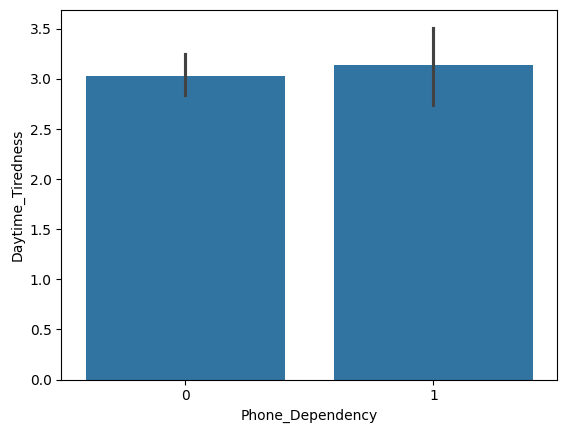